In [ ]:
import warnings;
warnings.simplefilter('ignore')
!pip install fbprophet


,  Using cached fbprophet-0.7.1.tar.gz (64 kB)
,  Preparing metadata (setup.py) ... done
,Requirement already satisfied: Cython>=0.22 in /usr/local/lib/python3.11/dist-packages (from fbprophet) (3.0.12)
,Collecting cmdstanpy==0.9.5 (from fbprophet)
,  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
,Collecting pystan>=2.14 (from fbprophet)
,  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
,Requirement already satisfied: numpy>=1.15.4 in /usr/local/lib/python3.11/dist-packages (from fbprophet) (2.0.2)
,Requirement already satisfied: pandas>=1.0.4 in /usr/local/lib/python3.11/dist-packages (from fbprophet) (2.2.2)
,Requirement already satisfied: matplotlib>=2.0.0 in /usr/local/lib/python3.11/dist-packages (from fbprophet) (3.10.0)
,Collecting LunarCalendar>=0.0.9 (from fbprophet)
,  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
,Collecting convertdate>=2.1.2 (from fbprophet)
,  Using cached convertdate-2.4.0-py3-none-any.whl.metada

**1) Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import warnings
from prophet import Prophet  # Facebook Prophet for time series forecasting
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score # Evaluation metrics from scikit-learn
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import ParameterGrid

**2) Loading data**

In [ ]:
df=pd.read_csv('sales_data.csv')

**3) Data Exploration:**

    1. Display the first few rows of the data
    2. Determine the shape of the data
    3. Generate descriptive statistics
    4. Display data type information
    5. Display the last few rows of the data
    6. Check for missing values

In [ ]:
df.head()

,ds,y
0,2025-01-01,110.794951
1,2025-01-02,100.054696
2,2025-01-03,117.732556
3,2025-01-04,137.197422
4,2025-01-05,104.010777


In [ ]:
df.shape

(365, 2)

In [ ]:
df.describe()

,y
count,365.000000
mean,300.198928
std,94.195583
min,87.953748
25%,249.390267
50%,302.322948
75%,357.356126
max,524.777092


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 365 entries, 0 to 364
,Data columns (total 2 columns):
, #   Column  Non-Null Count  Dtype  
,---  ------  --------------  -----  
, 0   ds      365 non-null    object 
, 1   y       365 non-null    float64
,dtypes: float64(1), object(1)
,memory usage: 5.8+ KB


In [ ]:
#Converting 'ds' datatype to datetime
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 365 entries, 0 to 364
,Data columns (total 2 columns):
, #   Column  Non-Null Count  Dtype         
,---  ------  --------------  -----         
, 0   ds      365 non-null    datetime64[ns]
, 1   y       365 non-null    float64       
,dtypes: datetime64[ns](1), float64(1)
,memory usage: 5.8 KB


In [ ]:
df.tail()

,ds,y
360,2025-12-27,502.551205
361,2025-12-28,524.777092
362,2025-12-29,493.905914
363,2025-12-30,506.074666
364,2025-12-31,513.802880


In [ ]:
df.isnull().sum()

,0
ds,0
y,0


**4) Data Visualization**

<Axes: xlabel='ds'>

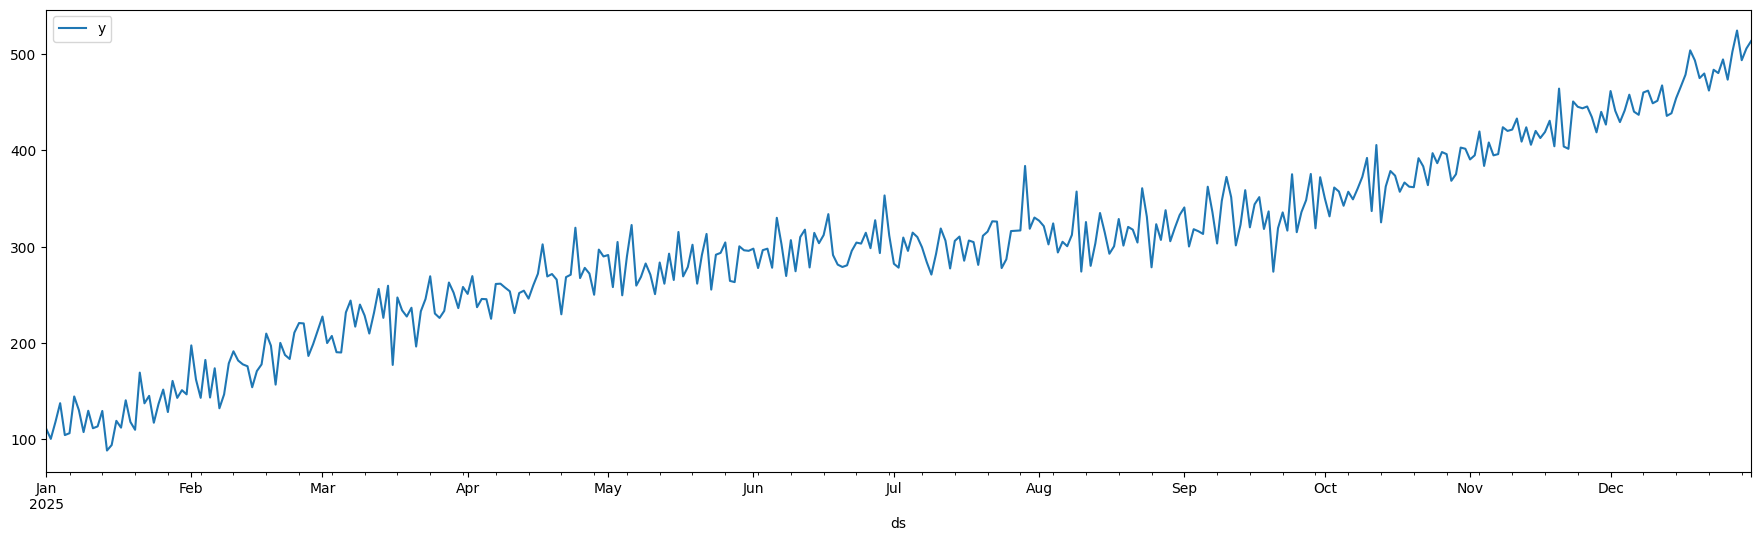

In [ ]:
#Pandas built-in plotting
#'ds' and 'y' are columns in the DataFrame 'df' - ds for dates and y for sales values
df.plot(x='ds',y='y',figsize=(22,6))

**5) Model Training**

In [ ]:
# Initializing the Prophet model with parameters
    # confidence interval set to 95%
    # Automatic detection of weekly seasonality
    # Automatic detection of daily seasonality
    # Assumption: seasonal effects are multiplicative (i.e.proportional to the trend)
m = Prophet(
    interval_width=0.95,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='multiplicative'
)
m.add_country_holidays(country_name='US')

In [ ]:
# Training/fitting the model on the dataset 'df'
model = m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
,DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkzst11b/arjkouj5.json
,DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkzst11b/zl8nru__.json
,DEBUG:cmdstanpy:idx 0
,DEBUG:cmdstanpy:running CmdStan, num_threads: None
,DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73582', 'data', 'file=/tmp/tmpkkzst11b/arjkouj5.json', 'init=/tmp/tmpkkzst11b/zl8nru__.json', 'output', 'file=/tmp/tmpkkzst11b/prophet_modelyrrkyfk1/prophet_model-20250325204223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
,20:42:23 - cmdstanpy - INFO - Chain [1] start processing
,INFO:cmdstanpy:Chain [1] start processing
,20:42:23 - cmdstanpy - INFO - Chain [1] done processing
,INFO:cmdstanpy:Chain [1] done processing


**6) Creating future dataframe and predicting/forecasting**

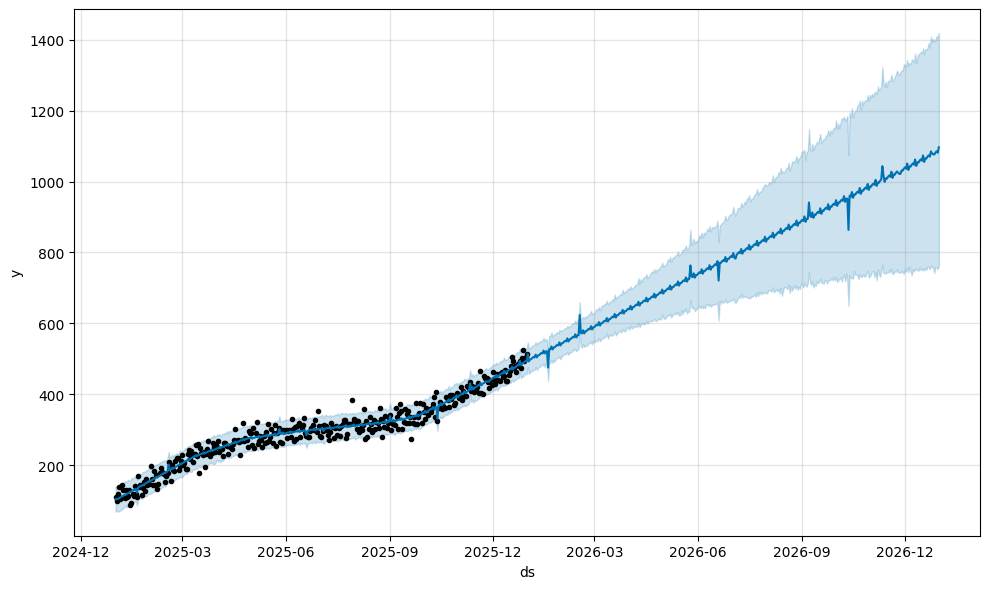

In [ ]:
# Create future dataframe
future = m.make_future_dataframe(periods=365)

# Forecast
forecast = m.predict(future)

# Plot forecast
fig = m.plot(forecast)

**7) Model Performance Evaluation**

In [ ]:
# Evaluation metrics:  Mean Absolute Error (mae), Root Mean Squared Error (rmse) and r squarred (R2)

y_true = df['y']
y_pred = model.predict(df)['yhat']

mae_val = mae(y_true, y_pred)
rmse_val = np.sqrt(mse(y_true, y_pred))
r2_val = r2_score(y_true, y_pred)

print(f"Mean Absolute Error (MAE): {mae_val}")
print(f"Root Mean Squared Error (RMSE): {rmse_val}")
print(f"R-squared (R2): {r2_val}")

Mean Absolute Error (MAE): 14.518982849039437
,Root Mean Squared Error (RMSE): 18.207477560160342
,R-squared (R2): 0.9625346349843402


**8) Model Optimization & Visualization**

In [ ]:
# (1) Hyperparameter tuning using GridSearch

    # Defining the hyperparameter grid for tuning
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 10000.0],
    'seasonality_prior_scale': [0.01, 0.1, 10000.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

    # Store results
results = []

for params in ParameterGrid(param_grid):
    m = Prophet(**params, weekly_seasonality=True, daily_seasonality=True, interval_width=0.95)
    m.add_country_holidays(country_name='US')
    model = m.fit(df)

    # Predict on the entire dataset
    forecast = model.predict(df)

    # Evaluate the model
    y_true = df['y']
    y_pred = forecast['yhat']

    mae_val = mae(y_true, y_pred)
    rmse_val = np.sqrt(mse(y_true, y_pred))
    r2_val = r2_score(y_true, y_pred)

    results.append([params, mae_val, rmse_val, r2_val])

    # Convert the results into a DataFrame
results_df = pd.DataFrame(results, columns=['Parameters', 'MAE', 'RMSE', 'R2'])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
,DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkzst11b/axwt05z1.json
,DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkzst11b/304t_h5u.json
,DEBUG:cmdstanpy:idx 0
,DEBUG:cmdstanpy:running CmdStan, num_threads: None
,DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41079', 'data', 'file=/tmp/tmpkkzst11b/axwt05z1.json', 'init=/tmp/tmpkkzst11b/304t_h5u.json', 'output', 'file=/tmp/tmpkkzst11b/prophet_modelrls4d0cn/prophet_model-20250325204905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
,20:49:05 - cmdstanpy - INFO - Chain [1] start processing
,INFO:cmdstanpy:Chain [1] start processing
,20:49:05 - cmdstanpy - INFO - Chain [1] done processing
,INFO:cmdstanpy:Chain [1] done processing
,INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
,DEBUG:cmdstanpy:input tempf

In [ ]:
# (2) Find the best parameters based on a chosen metric (e.g., MAE)

best_params = results_df.loc[results_df['MAE'].idxmin()]['Parameters']
print(f"Best Parameters: {best_params}")
print(results_df)

    # Train the model with the best hyperparameters
best_model = Prophet(**best_params, weekly_seasonality=True, daily_seasonality=True, interval_width=0.95)
best_model.add_country_holidays(country_name='US')
best_model = best_model.fit(df)

    # Make future predictions (this part is now correct)
future = best_model.make_future_dataframe(periods=365, freq='D')
forecast = best_model.predict(future)
    # Evaluate the best model on the entire dataset
y_true = df['y']
y_pred = best_model.predict(df)['yhat']

mae_val = mae(y_true, y_pred)
rmse_val = np.sqrt(mse(y_true, y_pred))
r2_val = r2_score(y_true, y_pred)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
,DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkzst11b/z3e82yfr.json
,DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkzst11b/5f8nzh1w.json
,DEBUG:cmdstanpy:idx 0
,DEBUG:cmdstanpy:running CmdStan, num_threads: None
,DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84603', 'data', 'file=/tmp/tmpkkzst11b/z3e82yfr.json', 'init=/tmp/tmpkkzst11b/5f8nzh1w.json', 'output', 'file=/tmp/tmpkkzst11b/prophet_modelk_xtclxb/prophet_model-20250325205212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
,20:52:12 - cmdstanpy - INFO - Chain [1] start processing
,INFO:cmdstanpy:Chain [1] start processing


Best Parameters: {'changepoint_prior_scale': 10000.0, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}
,                                           Parameters        MAE       RMSE  \
,0   {'changepoint_prior_scale': 0.01, 'seasonality...  19.082290  24.270356   
,1   {'changepoint_prior_scale': 0.01, 'seasonality...  17.175305  21.943652   
,2   {'changepoint_prior_scale': 0.01, 'seasonality...  18.693308  23.867431   
,3   {'changepoint_prior_scale': 0.01, 'seasonality...  16.715072  21.242906   
,4   {'changepoint_prior_scale': 0.01, 'seasonality...  15.009885  19.049867   
,5   {'changepoint_prior_scale': 0.01, 'seasonality...  14.780891  18.694641   
,6   {'changepoint_prior_scale': 0.1, 'seasonality_...  14.296466  18.371484   
,7   {'changepoint_prior_scale': 0.1, 'seasonality_...  14.302747  18.373611   
,8   {'changepoint_prior_scale': 0.1, 'seasonality_...  14.306519  18.378959   
,9   {'changepoint_prior_scale': 0.1, 'seasonality_...  14.341255  18.414408

20:52:12 - cmdstanpy - INFO - Chain [1] done processing
,INFO:cmdstanpy:Chain [1] done processing



,Evaluation of the best model:
,Mean Absolute Error (MAE): 14.003265833091929
,Root Mean Squared Error (RMSE): 17.8423943053097
,R-squared (R2): 0.9640220290369071


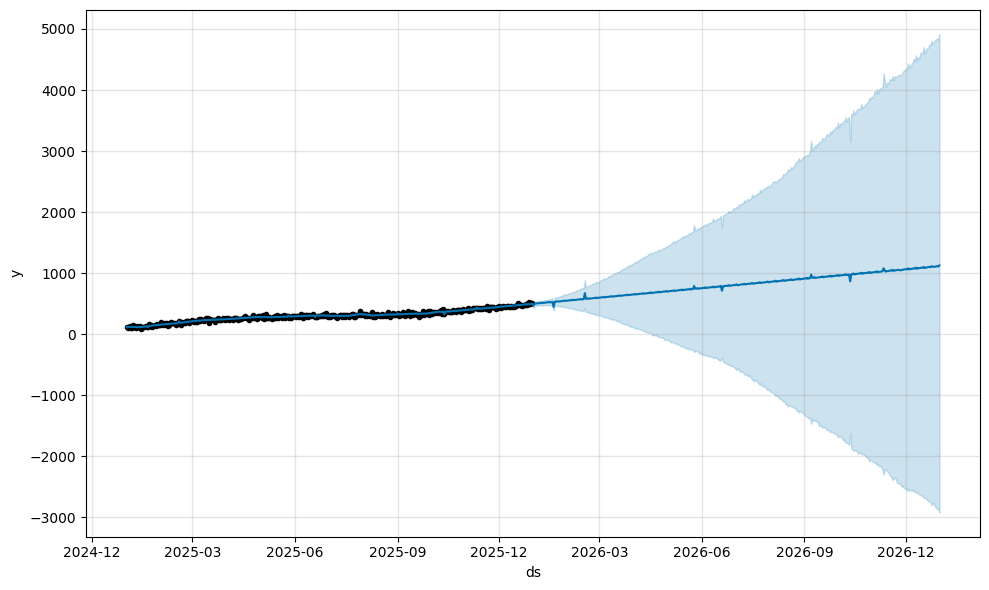

In [ ]:
# (3) Evaluating the best model and plotting the forecast

print(f"\nEvaluation of the best model:")
print(f"Mean Absolute Error (MAE): {mae_val}")
print(f"Root Mean Squared Error (RMSE): {rmse_val}")
print(f"R-squared (R2): {r2_val}")
best_model.plot(forecast)
plt.show()